<a href="https://colab.research.google.com/github/Yousefsame7/Mentorness/blob/main/Cricket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load your dataset
data = pd.read_csv('/content/T-20 World cup 2022.csv')

In [3]:
# 1. Data Exploration
# Basic statistics
print(data.describe())

          comment_id      match_id   innings_id         over         ball  \
count    9814.000000  9.814000e+03  9814.000000  9814.000000  9814.000000   
mean    85399.661708  1.298157e+06     1.477787    10.082841     3.486856   
std     78951.670137  1.355630e+01     0.499532     5.623045     1.707484   
min       110.000000  1.298135e+06     1.000000     1.000000     1.000000   
25%     18030.000000  1.298145e+06     1.000000     5.000000     2.000000   
50%     29010.000000  1.298157e+06     1.000000    10.000000     3.000000   
75%    118040.000000  1.298169e+06     2.000000    15.000000     5.000000   
max    219090.000000  1.298179e+06     2.000000    20.000000     6.000000   

              runs   batsman1_id  batsman1_runs  batsman1_balls    bowler1_id  \
count  9814.000000  9.814000e+03    9814.000000     9814.000000  9.814000e+03   
mean      1.202262  5.377303e+05      15.691971       13.249440  6.226676e+05   
std       1.476730  3.181419e+05      16.454378       11.471307

In [4]:
# Check for missing values
print(data.isnull().sum())

comment_id              0
match_id                0
match_name              0
home_team               0
away_team               0
current_innings         0
innings_id              0
over                    0
ball                    0
runs                    0
shortText               0
isBoundary              0
isWide                  0
isNoball                0
batsman1_id             0
batsman1_name           0
batsman1_runs           0
batsman1_balls          0
bowler1_id              0
bowler1_name            0
bowler1_overs           0
bowler1_maidens         0
bowler1_runs            0
bowler1_wkts            0
batsman2_id             0
batsman2_name           0
batsman2_runs           0
batsman2_balls          0
bowler2_id            526
bowler2_name          526
bowler2_overs         526
bowler2_maidens       526
bowler2_runs          526
bowler2_wkts          526
wicket_id            9263
wkt_batsman_name     9263
wkt_bowler_name      9263
wkt_batsman_runs     9263
wkt_batsman_

<ipython-input-6-c5d0bd64f843>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='match_id', y='runs', data=data, ci=None)


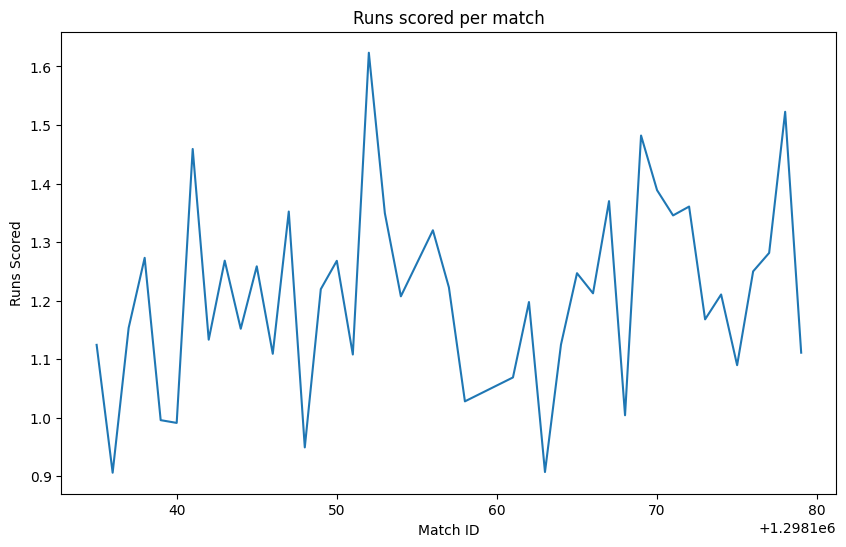

In [6]:
# Explore trends and patterns
# Example: Visualize runs scored per match
plt.figure(figsize=(10, 6))
sns.lineplot(x='match_id', y='runs', data=data, ci=None)
plt.title('Runs scored per match')
plt.xlabel('Match ID')
plt.ylabel('Runs Scored')
plt.show()

In [11]:
# 2. In-Depth Analysis
# Player statistics
player_stats = data.groupby('batsman1_name').agg({'runs': 'sum', 'wicket_id': 'sum'})
print(player_stats.head())

                  runs  wicket_id
batsman1_name                    
Aaron Finch        128    10668.0
Aayan Afzal Khan    25  2482530.0
Adam Zampa           1   379504.0
Afif Hossain       108  4679975.0
Aiden Markram      105  2401992.0


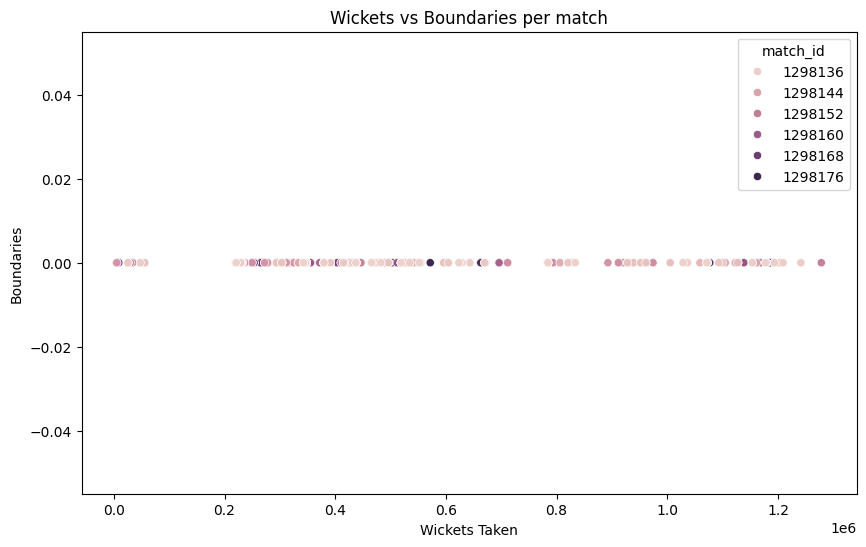

In [15]:
# 3. Event Inference
# Identify critical match events
# Example: Visualize wickets and boundaries per match
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wicket_id', y='isBoundary', data=data, hue='match_id')
plt.title('Wickets vs Boundaries per match')
plt.xlabel('Wickets Taken')
plt.ylabel('Boundaries')
plt.show()

In [17]:
# 4. Performance Evaluation
# Standout players
top_scorers = player_stats.sort_values(by='runs', ascending=False).head(10)
print("Top 10 Run Scorers:")
print(top_scorers)

Top 10 Run Scorers:
                  runs  wicket_id
batsman1_name                    
Virat Kohli        310  1015208.0
Max O'Dowd         265  5788773.0
Jos Buttler        241  1235868.0
Suryakumar Yadav   236  1786028.0
Pathum Nissanka    232  8229240.0
Sikandar Raza      230  2097004.0
Kusal Mendis       229  4403518.0
Alex Hales         218  1249330.0
Lorcan Tucker      217  3712228.0
Glenn Phillips     209  3294036.0


In [19]:
# 5. Statistical Insights
# Example: Match outcomes
match_outcomes = data.groupby('match_id').agg({'runs': 'sum', 'wicket_id': 'sum'})
match_outcomes['winner'] = np.where(match_outcomes['runs'] > match_outcomes['wicket_id'], 'Team A', 'Team B')
print("Match Outcomes:")
print(match_outcomes['winner'].value_counts())

Match Outcomes:
winner
Team B    42
Name: count, dtype: int64


<ipython-input-22-47beaad3312b>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='match_id', y='runs', hue='home_team', data=team_performance, ci=None)


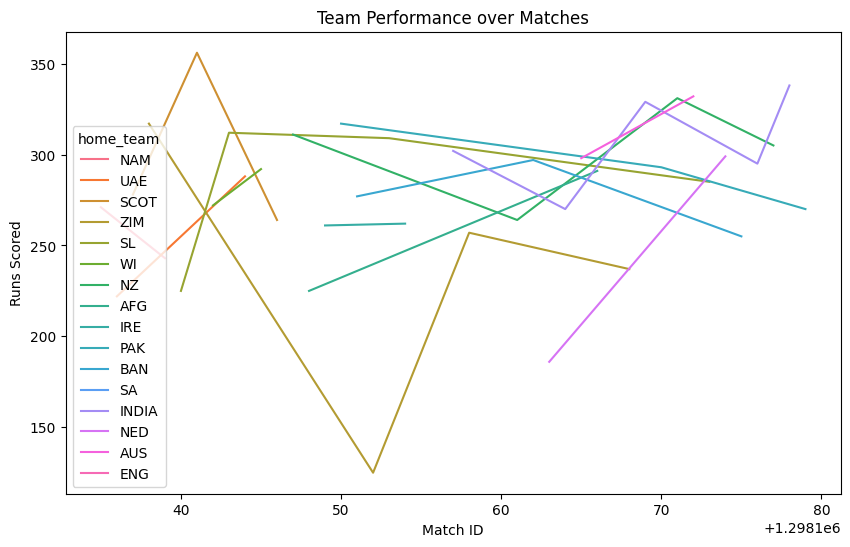

In [22]:
# Create visualizations to convey the story of the tournament
# Example: Team performance over matches
team_performance = data.groupby(['match_id', 'home_team']).agg({'runs': 'sum'}).reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='match_id', y='runs', hue='home_team', data=team_performance, ci=None)
plt.title('Team Performance over Matches')
plt.xlabel('Match ID')
plt.ylabel('Runs Scored')
plt.show()